# 最小二乗法

- 入力（理論値）：本例題では以下の関数を最小二乗法を用いて近似する
$$ y = \frac{sin(\pi x)}{\pi x}+\frac{x}{10}$$

- 基底関数：
$$\phi(x) = (1, sin(\frac{x}{2}), con(\frac{x}{2}), sin(\frac{2x}{2}), cos(\frac{2x}{2}), ・・・, sin(\frac{15x}{2}),cos(\frac{15x}{2}))^T$$

- 計画関数：
$$\Phi = \left(
\begin{array}{ccc} 
    \phi_1(x_1) & \vdots & \phi_b(x_1) \\ 
    \vdots      & \ddots & \vdots      \\ 
    \phi_1(x_n) & \vdots & \phi_b(x_n) 
\end{array}\right)$$

最小二乗誤差を最小にするようなパラメータ$\theta$を決定する。  
- 訓練二乗誤差:
$$ J_{LS}(\theta) = \frac{1}{2}\begin{Vmatrix}\Phi\theta-y\end{Vmatrix}$$

$J_{LS}$の偏微分値が0となるような$\theta$を求めれば良い
$$ \nabla_\theta J_{LS} = \left( \frac{\partial J_{LS}}{\partial\theta_1}, \dots, \frac{\partial J_{LS}}{\partial\theta_b}\right)^T = \Phi^T(\Phi\theta-y) = 0$$
なので、求めるべきパラメータ$\hat{\theta}_{LS}$は以下のようになる。ここで、$\Phi^\dagger$は計画行列$\Phi$の一般逆行列である。
$$ \hat{\theta}_{LS} = \Phi^\dagger y$$

In [2]:
import matplotlib.pyplot as plt
import numpy as np

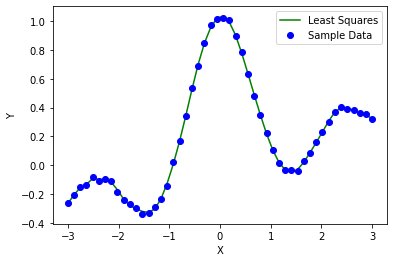

In [115]:
n = 50;

# データ生成
noise = 0.05*np.random.rand(n);
x = np.linspace(-3, 3, n);
y = np.sin(np.pi*x)/(np.pi*x)+0.1*x+noise;

# 最小二乗学習
m = 31; # パラメータ数
phi = np.zeros([n, m]);
phi[:,0] = np.ones([1,n]);

for i in range(int((m-1)/2)):
    phi[:, 2*i+1] = np.sin(0.5*i*x);
    phi[:, 2*i+2] = np.cos(0.5*i*x);

phi_inv = np.linalg.pinv(phi);
theta = phi_inv.dot(y);
y_hat = phi.dot(theta);

# 結果のプロット
plt.plot(x,y_hat, 'g-',label="Least Squares");
plt.plot(x,y, 'bo',label="Sample Data");
plt.xlabel('X');
plt.ylabel('Y');
plt.legend();